In [1]:
import librosa
import torch
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, scale
import IPython.display
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
audio_path = './audio_files/test01.wav'
audio, sr = librosa.load(audio_path, sr=16000)
print(len(audio))
audio, sr

258560


(array([ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         2.8622936e-04,  5.1556085e-04, -1.1040247e-05], dtype=float32),
 16000)

In [3]:
IPython.display.Audio(data=audio, rate=sr)

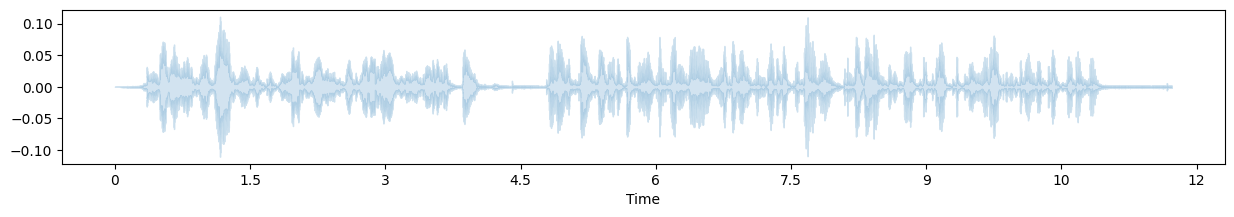

In [4]:
def draw_wave(sample_sound):
    plt.figure(figsize=(15,2))
    librosa.display.waveshow(sample_sound, alpha=0.2)
    plt.show()

draw_wave(audio)


In [6]:
def get_stft(sample_sound):  # short time fourier transform
    return librosa.stft(sample_sound)

stft_result = np.abs(get_stft(sample_sound=audio))
stft_result.shape

(1025, 506)

In [7]:
stft_result

array([[5.10212142e-12, 2.72534162e-05, 1.00808844e-04, ...,
        9.90647368e-06, 1.76666002e-03, 3.10731586e-03],
       [5.38666594e-12, 6.05346395e-05, 1.79340976e-04, ...,
        2.71566038e-04, 1.81237690e-03, 2.97292438e-03],
       [5.97759385e-12, 1.05336781e-04, 3.44299711e-04, ...,
        1.13137322e-03, 5.57169318e-04, 2.37454078e-03],
       ...,
       [6.68230082e-10, 2.73159717e-09, 1.42203440e-08, ...,
        7.65391093e-08, 1.52187640e-04, 3.04331625e-04],
       [6.49765852e-10, 2.41110598e-09, 1.37246969e-08, ...,
        1.46715786e-08, 1.52147462e-04, 3.03984474e-04],
       [6.38295916e-10, 2.17705609e-09, 1.40628424e-08, ...,
        1.46921941e-08, 1.52132285e-04, 3.04267422e-04]], dtype=float32)

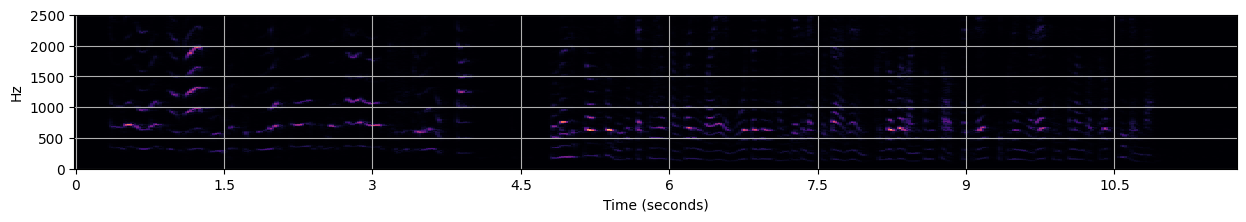

In [8]:
def draw_stft(sample_sound, ylim=(None, None)):
    plt.figure(figsize=(15,2))
    librosa.display.specshow(np.abs(get_stft(sample_sound=sample_sound)),
                             y_axis='hz', x_axis='s')
    plt.ylim(ylim)
    plt.grid()
    plt.show()

draw_stft(audio, ylim=(0, 2500))

In [9]:
mfccs = librosa.feature.mfcc(y=audio, 
                             sr=sr, 
                             n_mfcc=70, 
                             n_fft=400, 
                             hop_length=160)
mfccs, mfccs.shape

(array([[-9.3136121e+02, -9.3136121e+02, -9.3136121e+02, ...,
         -6.9581769e+02, -6.8094922e+02, -7.2819861e+02],
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
          3.5891975e+01,  4.6886551e+01,  4.5829395e+01],
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         -8.9375534e+00,  3.1758146e+00,  7.2782207e+00],
        ...,
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
          5.6929131e+00,  4.7626317e-01,  5.4464877e-02],
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
          4.2164087e+00, -1.5615289e+00,  1.7154129e+00],
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
          3.6673079e+00, -1.1333083e+00, -1.2735834e+00]], dtype=float32),
 (70, 1617))

① sr

sampling rate를 말합니다. default값은 22050Hz입니다. 저희는 앞서 음성 데이터를 load 할 때 sr을 16000Hz으로 했기 때문에 꼭 sr=16000을 파라미터로 삽입해야 합니다. (사람의 목소리는 대부분 16000Hz 안에 포함된다고 합니다)

② n_mfcc

return 될 mfcc의 개수를 정해주는 파라미터입니다. default값은 20입니다. 더 다양한 데이터 특징을 추출하기 위해서 이를 100까지 증가 시켰습니다. 

③ n_fft

frame의 length를 결정하는 파라미터 입니다. n_fft를 설정하면 window size가 자동으로 같은 값으로 설정되는데 window size의 크기로 잘린 음성이 n_fft보다 작은 경우 0으로 padding을 붙여주는 작업을 하기 때문에 n_fft는 window size보다 크거나 같아야 합니다. 

일반적으로 자연어 처리에서는 음성을 25m의 크기를 기본으로 하고 있으며 16000Hz인 음성에서는 400에 해당하는 값입니다. (16000 * 0.025 = 400) 즉, n_fft는 sr에 frame_length인 0.025를 곱한 값입니다.

④ hop_length

hop_length의 길이만큼 옆으로 가면서 데이터를 읽습니다. 10ms를 기본으로 하고 있어 16000Hz인 음성에서는 160에 해당합니다. (16000 * 0.01 = 160) 즉, hop_length는 sr에 frame_stride인 0.01를 곱해서 구할 수 있습니다.

window_length가 0.025이고 frame_stride가 0.01이라고 하면 0.015초씩은 데이터를 겹치면서 읽는다고 생각하면 됩니다.

- mfcc = librosa.feature.mfcc(audio, sr=16000, n_mfcc=100, n_fft=400, hop_length=160)

 

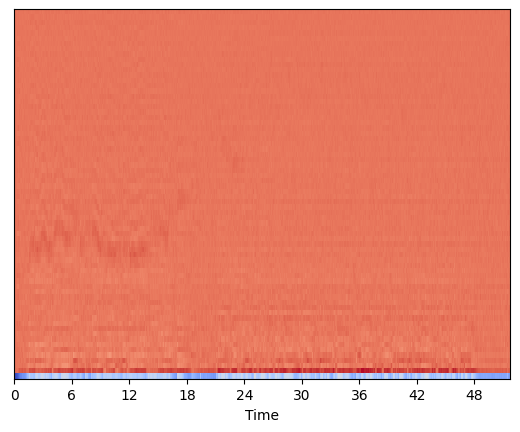

In [10]:
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

In [11]:
# pad2d = lambda a, i: a[:, 0:i] if a.shape[1] > i else np.hstack((a, np.zeros((a.shape[0], i-a.shape[1]))))
# padded_mfcc = pad2d(mfccs, 40)
# padded_mfcc

In [12]:
# mfccs.shape, padded_mfcc.shape

In [13]:
scaler = StandardScaler()
mfccs_scaled = scaler.fit_transform(mfccs.T)
mfccs_scaled, len(mfccs_scaled)

(array([[-4.3361235 , -2.137816  ,  0.521437  , ..., -0.24081711,
          0.16024125, -0.22907281],
        [-4.3361235 , -2.137816  ,  0.521437  , ..., -0.24081711,
          0.16024125, -0.22907281],
        [-4.3361235 , -2.137816  ,  0.521437  , ..., -0.24081711,
          0.16024125, -0.22907281],
        ...,
        [-1.5904933 , -1.289106  ,  0.14001784, ...,  1.2223654 ,
          1.3554882 ,  0.78941077],
        [-1.417178  , -1.0291258 ,  0.6569681 , ..., -0.11840881,
         -0.28241336, -0.54381484],
        [-1.9679439 , -1.0541235 ,  0.83204246, ..., -0.22681865,
          0.6465181 , -0.582772  ]], dtype=float32),
 1617)

In [14]:
# mfccs_scaled = scale(mfccs, axis=1)  # axis=1 이면 row별 스케일링, 0이면 칼럼별 스케일링 (0이면 StandardScaler와 같다.)
# mfccs_scaled, len(mfccs_scaled)

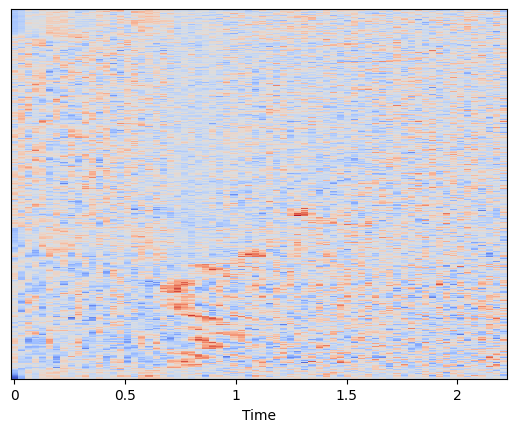

In [15]:
librosa.display.specshow(mfccs_scaled, sr=sr, x_axis='time')

In [16]:
# pad2d = lambda a, i: a[:, 0:i] if a.shape[1] > i else np.hstack((a, np.zeros((a.shape[0], i-a.shape[1]))))
# padded_mfcc = pad2d(mfccs_scaled, 40)
# padded_mfcc, padded_mfcc.shape

In [17]:
# librosa.display.specshow(padded_mfcc, sr=sr, x_axis='time')

In [18]:
kmeans = KMeans(n_clusters=2)  # Adjust based on the expected number of speakers
speaker_labels = kmeans.fit_predict(mfccs_scaled)
speaker_labels, len(speaker_labels)

(array([1, 1, 1, ..., 1, 1, 1], dtype=int32), 1617)

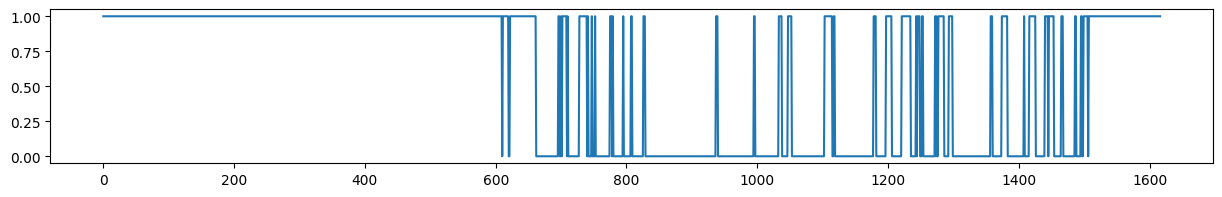

In [19]:
plt.figure(figsize=(15,2))
plt.plot(speaker_labels)

In [20]:
from spectralcluster import SpectralClusterer
from spectralcluster import RefinementOptions
from spectralcluster import ThresholdType
from spectralcluster import ICASSP2018_REFINEMENT_SEQUENCE

refinement_options = RefinementOptions(
    gaussian_blur_sigma=1,
    p_percentile=0.95,
    thresholding_soft_multiplier=0.01,
    thresholding_type=ThresholdType.RowMax,
    refinement_sequence=ICASSP2018_REFINEMENT_SEQUENCE)

from spectralcluster import AutoTune, AutoTuneProxy

autotune = AutoTune(
    p_percentile_min=0.60,
    p_percentile_max=0.95,
    init_search_step=0.01,
    search_level=3,
    proxy=AutoTuneProxy.PercentileSqrtOverNME)

clusterer = SpectralClusterer(
    min_clusters=2,
    max_clusters=5,
    autotune=autotune,
    laplacian_type=None,
    refinement_options=refinement_options,
    custom_dist="cosine")

labels = clusterer.predict(mfccs_scaled)
labels

array([1, 1, 1, ..., 1, 1, 1])

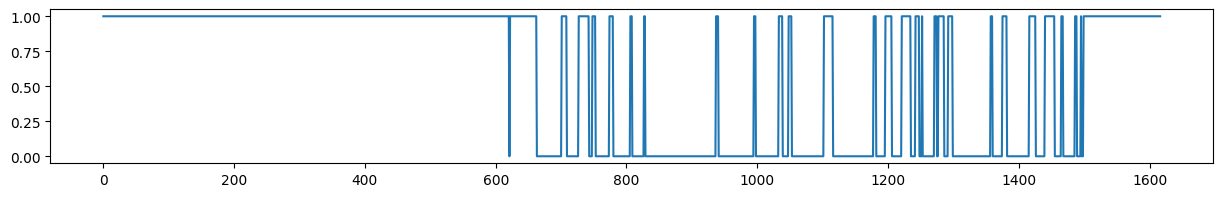

In [21]:
plt.figure(figsize=(15,2))
plt.plot(labels)